# Brain Tumor MRI Images 44 Classes

### Proje [linki](https://www.kaggle.com/datasets/fernando2rad/brain-tumor-mri-images-44c)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [42]:
train_path = "/kaggle/input/brain-tumor-mri-images-44c"

In [43]:
import cv2
img = cv2.imread("/kaggle/input/brain-tumor-mri-images-44c/Papiloma T2/8_big_gallery.jpeg")
img.shape

(630, 526, 3)

In [44]:
height = 240
width = 240

In [45]:
batch_size = 128
seed = 42

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

Found 3600 images belonging to 44 classes.


> train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2): Bu, bir görüntü veri artırma nesnesi oluşturur. rescale parametresi, görüntülerin piksel değerlerini 0-255 aralığından 0-1 aralığına ölçeklendirir. validation_split parametresi, eğitim verilerinin %20'sini doğrulama verisi olarak ayırır.

> train_dataset = train_datagen.flow_from_directory(train_path, target_size=(height, width), batch_size=batch_size, class_mode='categorical', shuffle=True, seed=seed, color_mode='rgb', interpolation='hamming', subset='training'): Bu, ImageDataGenerator nesnesini kullanarak bir veri kümesi oluşturur. flow_from_directory() yöntemi, verileri bir dizin yapısından yükler ve bu verileri veri artırma teknikleri uygulayarak modelin eğitimi için kullanılır. Aşağıdaki parametrelerle birlikte kullanılır:

> train_path: Verilerin yükleneceği dizin yolu

> target_size: Görüntülerin yeniden boyutlandırılacağı boyut

> batch_size: Bir seferde işlenecek örnek sayısı

> class_mode: Sınıflandırma işlemi olduğu için 'categorical' olarak ayarlanır.

> shuffle: Verilerin karıştırılıp karıştırılmayacağı

> seed: Karıştırma işlemi sırasında kullanılacak rastgele sayı üreticisi için tohum değeri

> color_mode: Görüntü renkli olduğu için 'rgb' olarak ayarlanır.

> interpolation: Görüntülerin yeniden boyutlandırılması sırasında kullanılacak interpolasyon tekniği

> subset: Veri kümesinin eğitim alt kümesi olarak kullanılacak verilerin seçimi (bu durumda, eğitim verileri için kullanılıyor)

> Bu kodlar, veri artırma işlemlerini otomatik olarak gerçekleştirerek ve önceden işlenmiş verileri yükleyerek bir Keras veri kümesi oluşturur. Bu veri kümesi, modelin eğitimi için kullanılabilir.

In [47]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 878 images belonging to 44 classes.


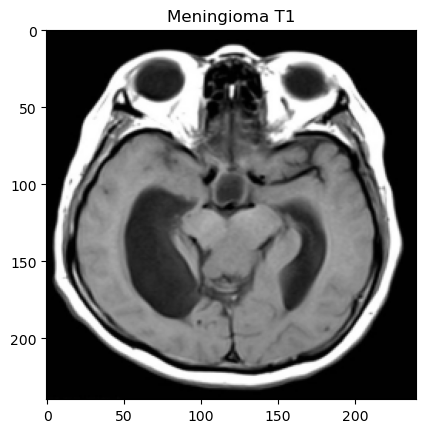

"\nBu kodlar, TensorFlow'da bir görüntü sınıflandırma veri kümesinden rastgele bir\nörnek seçerek, bu örnek görüntüyü ve etiketini ekrana basmak için kullanılır.\n\nİlk olarak, matplotlib.pyplot kütüphanesi import edilir. Ardından, train_dataset \nüzerinde next(iter(train_dataset)) kullanılarak veri kümesinden bir görüntü örneği \nve ona karşılık gelen etiket örneği alınır.\n\nDaha sonra, sınıf indekslerini sınıf adlarına dönüştürmek için \ntrain_dataset.class_indices.keys() kullanılarak sınıf adları listesi elde \nedilir. label.argmax() yöntemi kullanılarak örnek etiketi, sınıf indeksi \nyerine sınıf adı olarak alınır.\n\nSon olarak, plt.imshow() yöntemi kullanılarak görüntü örneği ekrana basılır \nve plt.title() yöntemi kullanılarak etiket adı başlık olarak eklenir. plt.show() \nyöntemi kullanılarak da görüntü ve başlık ekranda gösterilir.\n"

In [48]:
import matplotlib.pyplot as plt

# Veri kümesinden rastgele bir görüntü seçin
image_batch, label_batch = next(iter(train_dataset))
image = image_batch[0]
label = label_batch[0]

# Sınıf indekslerinden sınıf adlarına dönüştürme
class_names = list(train_dataset.class_indices.keys())
label = class_names[label.argmax()]

# Görüntüyü ve labelleri gösterme
plt.imshow(image)
plt.title(label)
plt.show()

"""
Bu kodlar, TensorFlow'da bir görüntü sınıflandırma veri kümesinden rastgele bir
örnek seçerek, bu örnek görüntüyü ve etiketini ekrana basmak için kullanılır.

İlk olarak, matplotlib.pyplot kütüphanesi import edilir. Ardından, train_dataset 
üzerinde next(iter(train_dataset)) kullanılarak veri kümesinden bir görüntü örneği 
ve ona karşılık gelen etiket örneği alınır.

Daha sonra, sınıf indekslerini sınıf adlarına dönüştürmek için 
train_dataset.class_indices.keys() kullanılarak sınıf adları listesi elde 
edilir. label.argmax() yöntemi kullanılarak örnek etiketi, sınıf indeksi 
yerine sınıf adı olarak alınır.

Son olarak, plt.imshow() yöntemi kullanılarak görüntü örneği ekrana basılır 
ve plt.title() yöntemi kullanılarak etiket adı başlık olarak eklenir. plt.show() 
yöntemi kullanılarak da görüntü ve başlık ekranda gösterilir.
"""

'\nBu kod bloğu, ImageDataGenerator nesnesi ile yüklenen veri kümesinden rastgele \nbir alt küme seçerek ve bu alt kümeden rastgele bir dizi görüntüyü ve etiketleri \nekrana çizdiriyor.\n\nİlk olarak, train_dataset.next() kullanılarak bir veri kümesi alt kümesi ve \nkarşılık gelen etiketler elde edilir. fig,ax = plt.subplots(3,4) ile 3 satır \nve 4 sütunluk bir alt grafik düzeni oluşturulur ve fig.set_size_inches(15,11) \nkullanılarak grafiğin boyutu belirlenir.\n\nDöngü, alt grafiklerin her birine bir görüntü ve karşılık gelen etiketi \nyerleştirir. rn.randint(0,batch_size-1) kullanılarak alt kümeden bir rastgele \ngörüntü seçilir ve list(train_dataset.class_indices.keys())[np.argmax(y[aziz])] \nkullanılarak etiket, veri kümesindeki sınıf isimleri listesinden elde edilir. \nGörüntü ve etiket her bir alt grafiğe yerleştirilir.\n\nSon olarak, plt.tight_layout() kullanılarak alt grafiklerin arasındaki \nboşluklar ayarlanır ve görüntüler ekrana çizdirilir.\n'

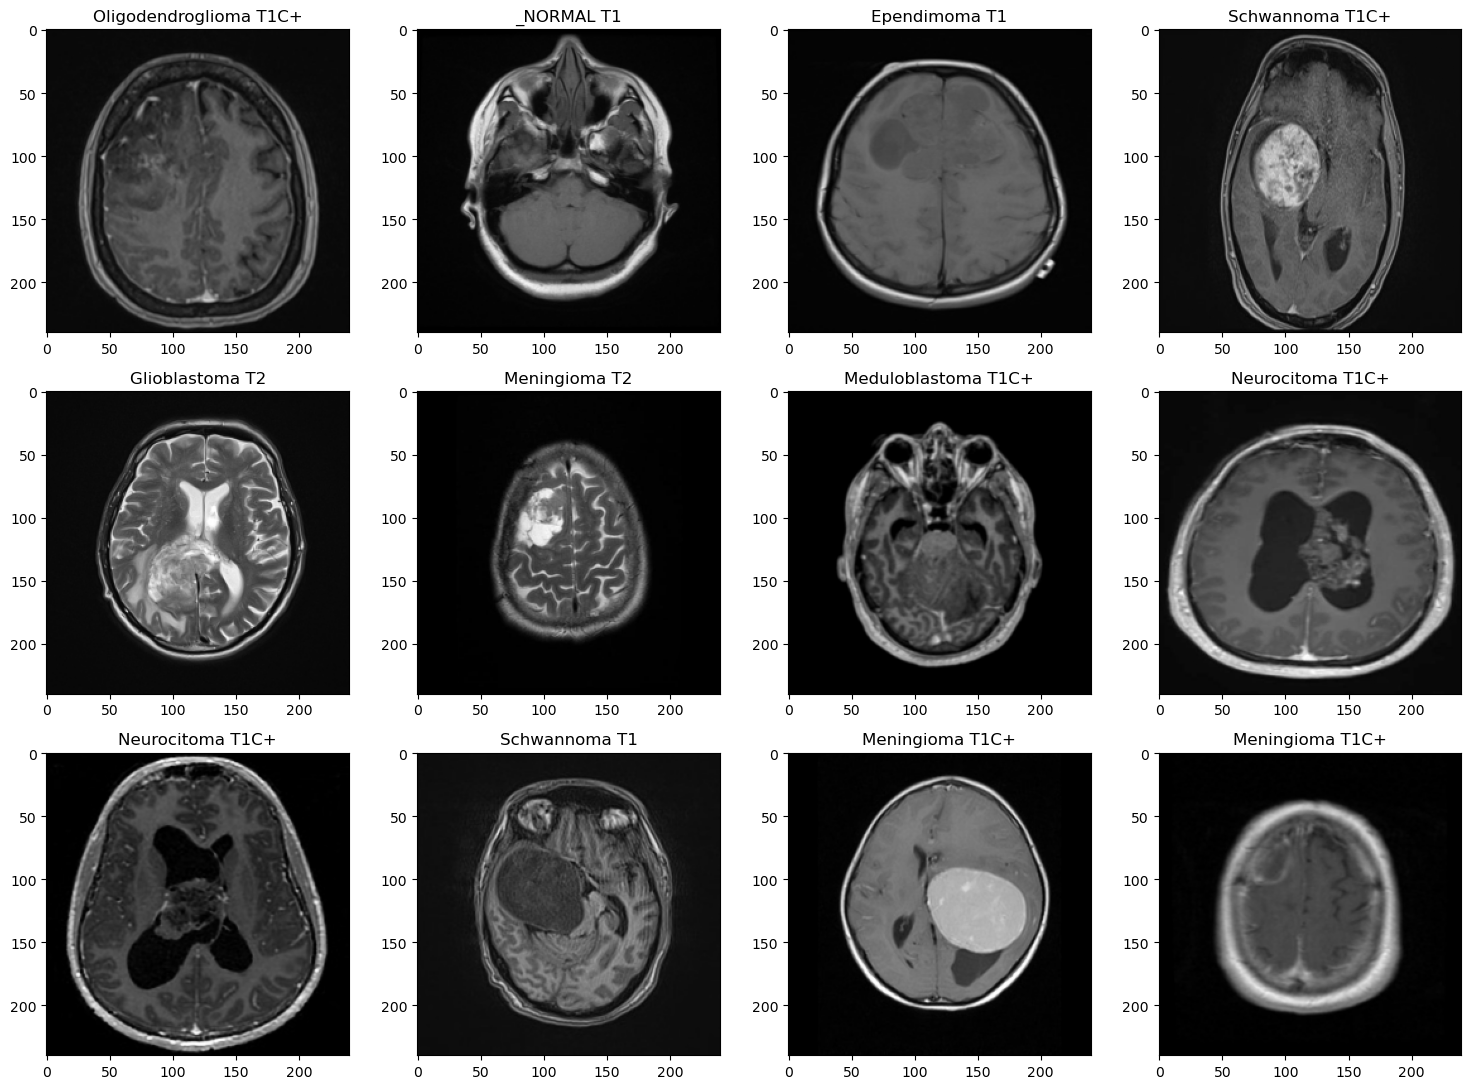

In [49]:
import random as rn
import matplotlib.pyplot as plt
fig,ax = plt.subplots(3,4)
fig.set_size_inches(15,11)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        aziz = rn.randint(0,batch_size-1)
        label = list(train_dataset.class_indices.keys())[np.argmax(y[aziz])]
        ax[i,j].imshow(img[aziz])
        ax[i,j].set_title(label)

plt.tight_layout()

"""
Bu kod bloğu, ImageDataGenerator nesnesi ile yüklenen veri kümesinden rastgele 
bir alt küme seçerek ve bu alt kümeden rastgele bir dizi görüntüyü ve etiketleri 
ekrana çizdiriyor.

İlk olarak, train_dataset.next() kullanılarak bir veri kümesi alt kümesi ve 
karşılık gelen etiketler elde edilir. fig,ax = plt.subplots(3,4) ile 3 satır 
ve 4 sütunluk bir alt grafik düzeni oluşturulur ve fig.set_size_inches(15,11) 
kullanılarak grafiğin boyutu belirlenir.

Döngü, alt grafiklerin her birine bir görüntü ve karşılık gelen etiketi 
yerleştirir. rn.randint(0,batch_size-1) kullanılarak alt kümeden bir rastgele 
görüntü seçilir ve list(train_dataset.class_indices.keys())[np.argmax(y[aziz])] 
kullanılarak etiket, veri kümesindeki sınıf isimleri listesinden elde edilir. 
Görüntü ve etiket her bir alt grafiğe yerleştirilir.

Son olarak, plt.tight_layout() kullanılarak alt grafiklerin arasındaki 
boşluklar ayarlanır ve görüntüler ekrana çizdirilir.
"""

In [50]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [51]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Dense(44, activation='softmax')
])

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 236, 236, 16)      1216      
                                                                 
 conv2d_13 (Conv2D)          (None, 232, 232, 32)      12832     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 116, 116, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 116, 116, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 114, 114, 128)     36992     
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 64)     

In [53]:
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [54]:
epochs = 10
history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=epochs,
                    validation_data=test_dataset,
                    validation_steps=len(test_dataset))

Epoch 1/10
29/29 [==============================] - 625s 21s/step - loss: 2.1927 - accuracy: 0.5081 - val_loss: 5.2426 - val_accuracy: 0.0900
Epoch 2/10
29/29 [==============================] - 625s 22s/step - loss: 0.6730 - accuracy: 0.8328 - val_loss: 6.7605 - val_accuracy: 0.0330
Epoch 3/10
29/29 [==============================] - 607s 22s/step - loss: 0.2681 - accuracy: 0.9386 - val_loss: 9.6054 - val_accuracy: 0.0330
Epoch 4/10
29/29 [==============================] - 633s 22s/step - loss: 0.1128 - accuracy: 0.9778 - val_loss: 11.0698 - val_accuracy: 0.0285
Epoch 5/10
29/29 [==============================] - 609s 21s/step - loss: 0.0642 - accuracy: 0.9892 - val_loss: 11.9835 - val_accuracy: 0.0330
Epoch 6/10
29/29 [==============================] - 618s 21s/step - loss: 0.0476 - accuracy: 0.9908 - val_loss: 11.7328 - val_accuracy: 0.0456
Epoch 7/10
29/29 [==============================] - 630s 22s/step - loss: 0.0297 - accuracy: 0.9964 - val_loss: 12.4264 - val_accuracy: 0.0535
Ep

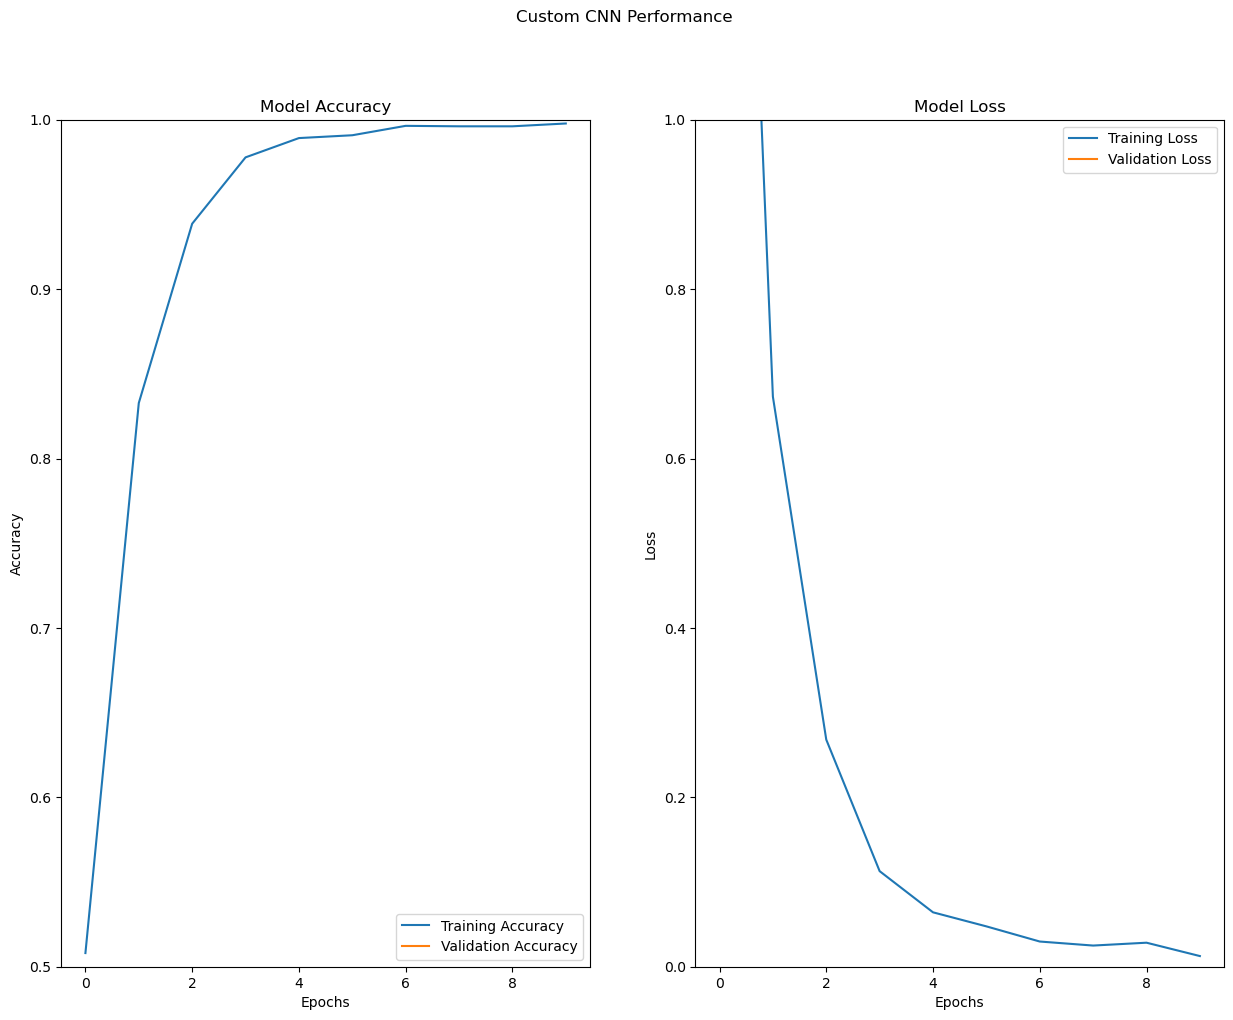

<Figure size 1000x700 with 0 Axes>

In [55]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,11)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

In [56]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)  # En yüksek olasılıklı sınıfın indekslerini alın
predictions = predictions.astype(int)  # int tipine dönüştürün

7/7 [==============================] - 35s 5s/step


4/4 [==============================] - 5s 1s/step


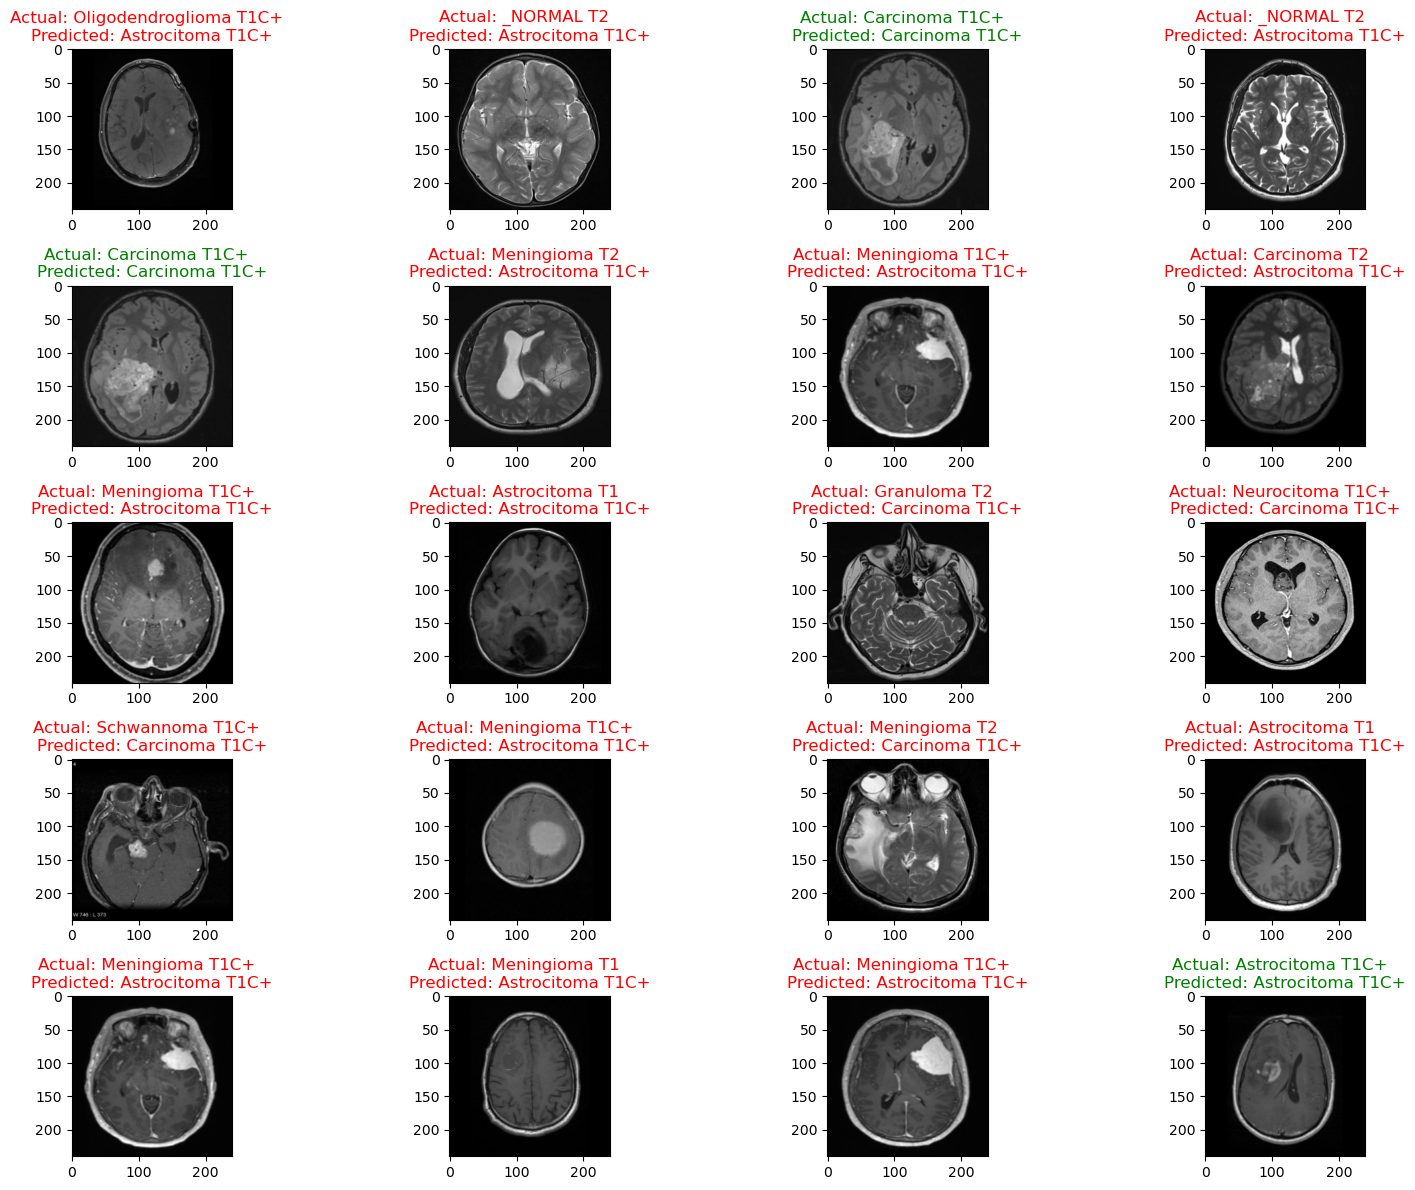

In [60]:
def map_pred(pred):
    return [list(train_dataset.class_indices.keys())[i] for i in pred]

a = 5
b = 4

fig,ax=plt.subplots(a,b)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(a):
    for j in range (b):
        aziz = rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[aziz])
        if labels[aziz] == predicts[aziz]:
            ax[i,j].set_title('Actual: '+labels[aziz]+'  \nPredicted: '+predicts[aziz], color = 'green')
        else: 
            ax[i,j].set_title('Actual: '+labels[aziz]+'  \nPredicted: '+predicts[aziz], color = 'red')

plt.tight_layout()